In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import the dataset
attendance = pd.read_csv('/Users/jonathanpiscart/Desktop/Hackathon/final_data/attendance.csv')
entity_schedule = pd.read_csv('/Users/jonathanpiscart/Desktop/Hackathon/final_data/entity_schedule.csv')
link_attraction_park = pd.read_csv('/Users/jonathanpiscart/Desktop/Hackathon/final_data/link_attraction_park.csv')
waiting_times = pd.read_csv('/Users/jonathanpiscart/Desktop/Hackathon/final_data/waiting_times.csv')
weather_data = pd.read_csv('/Users/jonathanpiscart/Desktop/Hackathon/final_data/weather_data.csv')

In [3]:
entity_schedule.head(5)

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
0,NaN,Tivoli Gardens,PARK,2018-11-19 10:00:00.000,2018-11-19 18:00:00.000,2018-11-20 08:24:32.000,2018-11-19
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07
2,NaN,Sling Shot,ATTR,2018-03-28 08:37:00.000,2018-03-28 18:12:00.000,2018-03-29 08:24:37.000,2018-03-28
3,NaN,Gondola,ATTR,2019-04-11 09:55:00.000,2019-04-11 20:19:00.000,2019-04-12 08:59:29.000,2019-04-11
4,NaN,Monorail,ATTR,2019-06-29 08:30:00.000,2019-06-29 20:35:00.000,2019-06-30 08:14:16.000,2019-06-29


In [4]:
waiting_times.head(10)

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,OPEN_TIME,UP_TIME,DOWNTIME,NB_MAX_UNIT
0,2018-01-01,2018-01-01 21:00:00.000,21,2018-01-01 21:15:00.000,Roller Coaster,0,2.0,0.0,0.000,0.00,0,0,0,2.0
1,2018-01-01,2018-01-01 19:30:00.000,19,2018-01-01 19:45:00.000,Bumper Cars,5,18.0,148.0,254.749,254.75,15,15,0,18.0
2,2018-01-01,2018-01-01 22:30:00.000,22,2018-01-01 22:45:00.000,Rapids Ride,0,1.0,0.0,0.000,0.00,0,0,0,2.0
3,2018-01-01,2018-01-01 12:45:00.000,12,2018-01-01 13:00:00.000,Crazy Dance,5,1.0,46.0,250.001,250.00,15,15,0,1.0
4,2018-01-01,2018-01-01 17:00:00.000,17,2018-01-01 17:15:00.000,Skyway,5,15.0,92.0,211.500,198.25,15,15,0,16.0
5,2018-01-01,2018-01-01 18:15:00.000,18,2018-01-01 18:30:00.000,Free Fall,50,3.0,0.0,0.000,0.00,0,0,0,3.0
6,2018-01-01,2018-01-01 13:30:00.000,13,2018-01-01 13:45:00.000,Monorail,70,11.0,145.0,223.751,223.75,15,15,0,11.0
7,2018-01-01,2018-01-01 15:00:00.000,15,2018-01-01 15:15:00.000,Roller Coaster,20,2.0,51.0,75.000,75.00,15,15,0,2.0
8,2018-01-01,2018-01-01 18:00:00.000,18,2018-01-01 18:15:00.000,Swing Ride,50,12.0,74.0,242.250,242.25,15,15,0,12.0
9,2018-01-01,2018-01-01 17:15:00.000,17,2018-01-01 17:30:00.000,Crazy Bus,5,6.0,271.0,353.000,353.00,15,15,0,6.0


(array([2.155434e+06, 1.881620e+05, 2.191070e+05, 1.162680e+05,
        1.450750e+05, 2.138010e+05, 9.414200e+04, 9.251300e+04,
        6.245600e+04, 3.333900e+04, 7.932000e+04, 2.356400e+04,
        2.463100e+04, 1.321300e+04, 6.117000e+03, 2.184000e+04,
        5.388000e+03, 1.582000e+03, 2.808000e+03, 7.030000e+02,
        6.675000e+03, 5.100000e+02, 1.670000e+02, 3.740000e+02,
        7.500000e+01, 6.860000e+02, 1.670000e+02, 3.600000e+01,
        2.600000e+01, 1.500000e+01, 6.600000e+02, 3.500000e+01,
        2.000000e+00, 7.200000e+01, 8.000000e+00, 1.170000e+02,
        1.800000e+01, 5.000000e+00, 0.000000e+00, 0.000000e+00,
        5.700000e+01, 3.000000e+00, 8.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.450000e+02]),
 array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,
         66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120., 126.,
        132., 138., 144., 150., 156., 162., 16

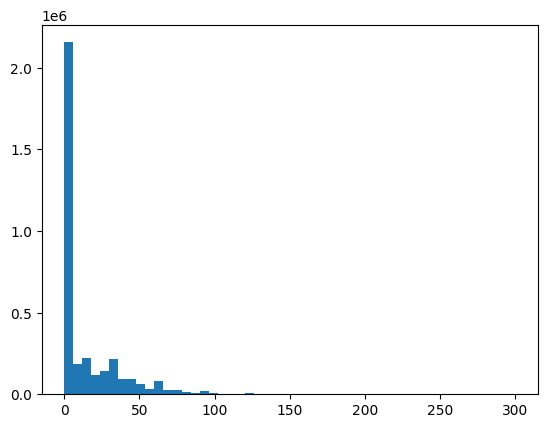

: 

In [ ]:
# Histogram of waiting times
plt.hist(waiting_times['WAIT_TIME_MAX'], bins=50)

In [ ]:
# Convert time columns to datetime format
waiting_times["DEB_TIME"] = pd.to_datetime(waiting_times["DEB_TIME"])
waiting_times["FIN_TIME"] = pd.to_datetime(waiting_times["FIN_TIME"])
entity_schedule["DEB_TIME"] = pd.to_datetime(entity_schedule["DEB_TIME"])
entity_schedule["FIN_TIME"] = pd.to_datetime(entity_schedule["FIN_TIME"])

print('1')

# Merge datasets to check if the ride was open during the DEB_TIME. Only keep the weiting_times rows
merged = waiting_times.merge(
    entity_schedule, 
    left_on="ENTITY_DESCRIPTION_SHORT", 
    right_on="ENTITY_DESCRIPTION_SHORT", 
    suffixes=("_waiting", "_schedule"),
    how="left"
)
print('2')


# Keep only rows where the DEB_TIME of waiting_times is within the attraction's open hours
filtered = merged[
    (merged["DEB_TIME_waiting"] >= merged["DEB_TIME_schedule"]) &
    (merged["DEB_TIME_waiting"] <= merged["FIN_TIME_schedule"])
]
print('3')

# Drop unnecessary columns
filtered = filtered[waiting_times.columns]
print('4')

filtered.head(10)


1
